<a href="https://colab.research.google.com/github/pythonuzgit/Deep-Learning-Apps-Using-Python/blob/master/Machine%20Learning/Regression_Models_with_Decision_Tree%2C_Random_Forest_and_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from zipfile import ZipFile
file_name = "/content/stockholm-house-market-prices.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [61]:
df = pd.read_csv('/content/hemnet_data_clean.csv')
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
df.head()

address  asked_price                               coordinate  \
0    Markviksvägen 15    6475000.0                  [59.371685, 17.8250389]   
1  Mälarhöjdsvägen 38    9950000.0                 [59.3008766, 17.9478054]   
2     Häradsvägen 202    5795000.0  [59.27202322587505, 17.954076342308372]   
3     Hemmansvägen 18   11950000.0   [59.28390406370304, 18.07625832074728]   
4     Alholmsbacken 8    7950000.0                   [59.28134, 17.9009438]   

   final_price  pourcentage_difference  land_area   area  \
0      6950000                     7.0      635.0  117.0   
1     11300000                    14.0      882.0  195.0   
2      6200000                     7.0     1224.0   90.0   
3     12700000                     6.0      542.0  110.0   
4      8100000                     2.0      690.0  157.0   

                                       commune  price_per_area  rooms  \
0  Hässelby Södra Villastad, Stockholms kommun         59402.0    5.0   
1   Mälarhöjden - Hägersten, Stockholms kommun         57949.0    5.0   
2                   Segeltorp, Huddinge kommun         68889.0    6.0   
3             Gamla Enskede, Stockholms kommun        115455.0    5.0   
4          Skärholmshöjden., Stockholms kommun         51592.0    6.0   

         sale_date  supplemental_area  
0  Såld 2022-06-17               44.0  
1  Såld 2022-06-17               22.0  
2  Såld 2022-06-17               90.0  
3  Såld 2022-06-17               48.0  
4  Såld 2022-06-17                0.0

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   address                 500 non-null    object 
 1   asked_price             500 non-null    float64
 2   coordinate              500 non-null    object 
 3   final_price             500 non-null    int64  
 4   pourcentage_difference  500 non-null    float64
 5   land_area               495 non-null    float64
 6   area                    499 non-null    float64
 7   commune                 500 non-null    object 
 8   price_per_area          499 non-null    float64
 9   rooms                   490 non-null    float64
 10  sale_date               500 non-null    object 
 11  supplemental_area       500 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 47.0+ KB


Converting Catagorical Variables

In [63]:
df_frequency_map = df.price_per_area.value_counts().to_dict()
df.zip_code = df.price_per_area.map(df_frequency_map)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


address  asked_price                               coordinate  \
0    Markviksvägen 15    6475000.0                  [59.371685, 17.8250389]   
1  Mälarhöjdsvägen 38    9950000.0                 [59.3008766, 17.9478054]   
2     Häradsvägen 202    5795000.0  [59.27202322587505, 17.954076342308372]   
3     Hemmansvägen 18   11950000.0   [59.28390406370304, 18.07625832074728]   
4     Alholmsbacken 8    7950000.0                   [59.28134, 17.9009438]   

   final_price  pourcentage_difference  land_area   area  \
0      6950000                     7.0      635.0  117.0   
1     11300000                    14.0      882.0  195.0   
2      6200000                     7.0     1224.0   90.0   
3     12700000                     6.0      542.0  110.0   
4      8100000                     2.0      690.0  157.0   

                                       commune  price_per_area  rooms  \
0  Hässelby Södra Villastad, Stockholms kommun         59402.0    5.0   
1   Mälarhöjden - Hägersten, Stockholms kommun         57949.0    5.0   
2                   Segeltorp, Huddinge kommun         68889.0    6.0   
3             Gamla Enskede, Stockholms kommun        115455.0    5.0   
4          Skärholmshöjden., Stockholms kommun         51592.0    6.0   

         sale_date  supplemental_area  
0  Såld 2022-06-17               44.0  
1  Såld 2022-06-17               22.0  
2  Såld 2022-06-17               90.0  
3  Såld 2022-06-17               48.0  
4  Såld 2022-06-17                0.0

In [64]:
df_frequency_map2 = df.area.value_counts().to_dict()
df.city = df.area.map(df_frequency_map2)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


address  asked_price                               coordinate  \
0    Markviksvägen 15    6475000.0                  [59.371685, 17.8250389]   
1  Mälarhöjdsvägen 38    9950000.0                 [59.3008766, 17.9478054]   
2     Häradsvägen 202    5795000.0  [59.27202322587505, 17.954076342308372]   
3     Hemmansvägen 18   11950000.0   [59.28390406370304, 18.07625832074728]   
4     Alholmsbacken 8    7950000.0                   [59.28134, 17.9009438]   

   final_price  pourcentage_difference  land_area   area  \
0      6950000                     7.0      635.0  117.0   
1     11300000                    14.0      882.0  195.0   
2      6200000                     7.0     1224.0   90.0   
3     12700000                     6.0      542.0  110.0   
4      8100000                     2.0      690.0  157.0   

                                       commune  price_per_area  rooms  \
0  Hässelby Södra Villastad, Stockholms kommun         59402.0    5.0   
1   Mälarhöjden - Hägersten, Stockholms kommun         57949.0    5.0   
2                   Segeltorp, Huddinge kommun         68889.0    6.0   
3             Gamla Enskede, Stockholms kommun        115455.0    5.0   
4          Skärholmshöjden., Stockholms kommun         51592.0    6.0   

         sale_date  supplemental_area  
0  Såld 2022-06-17               44.0  
1  Såld 2022-06-17               22.0  
2  Såld 2022-06-17               90.0  
3  Såld 2022-06-17               48.0  
4  Såld 2022-06-17                0.0

In [65]:
df.drop('address',axis=1,inplace=True)
df.drop('coordinate',axis=1,inplace=True)
df.drop('commune',axis=1,inplace=True)
df.drop('sale_date', axis = 1, inplace = True)

In [66]:
df.tail()

asked_price  final_price  pourcentage_difference  land_area   area  \
495    9500000.0     11760000                    24.0      624.0  164.0   
496    7295000.0      7295000                     0.0      618.0  125.0   
497    9795000.0     10200000                     4.0      700.0  172.0   
498   11950000.0     13000000                     9.0     1307.0  174.0   
499   12495000.0     15000000                    20.0      691.0  137.0   

     price_per_area  rooms  supplemental_area  
495         71707.0    8.0               70.0  
496         58360.0    NaN               81.0  
497         59302.0    6.0               36.0  
498         74713.0    8.0               90.0  
499        109489.0    5.0               64.0

In [67]:
df.shape

(500, 8)

In [68]:
df.columns

Index(['asked_price', 'final_price', 'pourcentage_difference', 'land_area',
       'area', 'price_per_area', 'rooms', 'supplemental_area'],
      dtype='object')

Separating independent and dependent variable

In [72]:
X = df.drop('final_price', axis =1)
y = df['final_price']

In [78]:
X.isna().sum()

asked_price                0
pourcentage_difference     0
land_area                  5
area                       1
price_per_area             1
rooms                     10
supplemental_area          0
dtype: int64

In [79]:
X.fillna(method= 'ffill', inplace=True)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.4)

In [81]:
X_train.shape, y_train.shape

((300, 7), (300,))

In [82]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

Regression coefficients

In [83]:
print('Coefficients:', reg.coef_)

Coefficients: [ 1.00257358e+00  8.59818292e+04 -1.74210680e+00  7.47663131e+01
  4.20938964e+00  9.53225135e+03 -2.52418274e+03]


variance score: 1 means perfect prediction

In [84]:
print('Variance score: {}'.format(reg.score(X_test, y_test)))

Variance score: 0.9759180823649167


plot for residual error

In [85]:
plt.style.use('fivethirtyeight')

plotting residual errors in training data

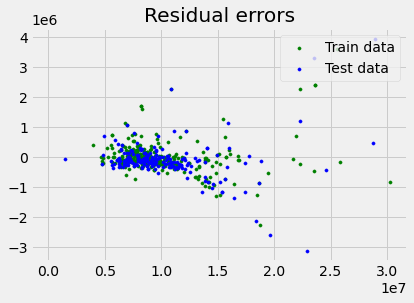

In [87]:
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
  
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
  
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
  
## plotting legend
plt.legend(loc = 'upper right')
  
## plot title
plt.title("Residual errors")
  
## method call for showing the plot
plt.show()

Making predictions using the Decision Tree algorithm

In [88]:
decision_model = DecisionTreeRegressor()
decision_model.fit(X_train, y_train)
predicted_decision_trees = decision_model.predict(X_test)
print("Mean Absolute Error using Decision Trees:", mean_absolute_error(y_test, predicted_decision_trees))
print(decision_model.score(X_test, y_test))

Mean Absolute Error using Decision Trees: 431310.0
0.9651216577165026


Making predictions using the Random Forest algorithm

In [89]:
forest_model = RandomForestRegressor(n_estimators = 100, max_depth = 10)
forest_model.fit(X_train, y_train)
predicted_random_forest = forest_model.predict(X_test)
print("Mean Absolute Error using Random Forest:", mean_absolute_error(y_test, predicted_decision_trees)) 
print(forest_model.score(X_test, y_test))

Mean Absolute Error using Random Forest: 431310.0
0.9748834564046786


Making predictions using the XGBoost algorithm

In [90]:
xg_model = XGBRegressor(n_estimators = 100)
xg_model.fit(X_train, y_train)
predicted_XGBoost = xg_model.predict(X_test)

print("Mean Absolute Error using XGBoost:", mean_absolute_error(y_test, predicted_XGBoost))
print(xg_model.score(X_test, y_test))

[14:57:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute Error using XGBoost: 355064.725
0.9742582008290047
